In [1]:
import matplotlib.pyplot as plt

from mcstasscript.interface.instr import McStas_instr
from mcstasscript.helper.mcstas_objects import Component
import mcstasscript as ms
import os

# Expand the home directory and make path absolute
mcrun_path = os.path.expanduser("~/.local/share/mamba/envs/mcstas/bin/")
mcstas_path = os.path.expanduser("~/.local/share/mamba/envs/mcstas/bin/")
# Initialize configurator
my_configurator = ms.Configurator()
my_configurator.set_mcrun_path(mcrun_path)
my_configurator.set_mcstas_path(mcstas_path)
# Print for confirmation
print(my_configurator)

Configurator:
 paths:
  mcrun_path: /SNS/users/ccu/.local/share/mamba/envs/mcstas/bin/
  mcstas_path: /SNS/users/ccu/.local/share/mamba/envs/mcstas/bin/
  mcxtrace_path: /Applications/McXtrace-1.5.app/Contents/Resources/mcxtrace/1.5/
  mxrun_path: /Applications/McXtrace-1.5.app/Contents/Resources/mcxtrace/1.5/bin/
 other:
  characters_per_line: 85



In [2]:
# Define instrument
instr = McStas_instr("ILL_H512_D22")

# Add input parameters
instr.add_parameter("lambda", value=10)
instr.add_parameter("dlambda", value=10)
instr.add_parameter("D22_collimation", value=2)
instr.add_parameter("D22_nu", value=300)

# DECLARE variables
instr.add_declare_var("double", "sT3", value=413.5)
instr.add_declare_var("double", "sI3", value=10.22e12)
instr.add_declare_var("double", "sT2", value=145.8)
instr.add_declare_var("double", "sI2", value=3.44e13)
instr.add_declare_var("double", "sT1", value=40.1)
instr.add_declare_var("double", "sI1", value=2.78e13)
instr.add_declare_var("double", "gR0", value=1)
instr.add_declare_var("double", "gQc", value=0.0216)
instr.add_declare_var("double", "gAlpha", value=4.07)
instr.add_declare_var("double", "gW", value=1.0 / 300.0)
instr.add_declare_var("double", "Al_Thickness", value=0.001)
instr.add_declare_var("double", "gGap", value=0.001)
instr.add_declare_var("double", "flag", value=0)

# COMPONENTS
origin = instr.add_component("Origin", "Progress_bar")
origin.set_AT([0, 0, 0], RELATIVE="ABSOLUTE")

source = instr.add_component("HCS", "Source_gen")
source.set_parameters(
    radius=0.21/2,
    zdepth=0.15,
    dist=2.155,
    focus_xw=0.123,
    focus_yh=0.120,
    lambda0="lambda",
    dlambda="dlambda",
    T1="sT1", I1="sI1",
    T2="sT2", I2="sI2",
    T3="sT3", I3="sI3",
    verbose=1
)
source.set_AT([0, 0, 0], RELATIVE="Origin")

vsel = instr.add_component("D22_Vselector", "V_selector")
vsel.set_parameters(
    xwidth=0.04,
    yheight=0.05,
    zdepth=0.30,
    radius=0.12,
    alpha=48.3,
    length=0.25,
    d=0.0004,
    nu="D22_nu",
    nslit=72
)
vsel.set_AT([0.05, 0, 1], RELATIVE="PREVIOUS")

monitor = instr.add_component("l_monitor", "L_monitor")
monitor.set_parameters(
    nL=100,
    filename='"test_l_monitor"',
    xwidth=0.1,
    yheight=0.1,
    Lmin=0,
    Lmax=15
)
monitor.set_AT([0, 0, 10], RELATIVE="ABSOLUTE")


In [3]:
instr.set_parameters(D22_nu=250)
instr.settings(ncount=1E8)

data = instr.backengine()


INFO: Using directory: "/SNS/users/ccu/Documents/MLSR/monochromatic/mcstas/ILL_H512_D22_14"
INFO: Regenerating c-file: ILL_H512_D22.c
CFLAGS=

-----------------------------------------------------------

Generating single GPU kernel or single CPU section layout: 

-----------------------------------------------------------

Generating GPU/CPU -DFUNNEL layout:

-----------------------------------------------------------
INFO: Recompiling: ./ILL_H512_D22.out
lto-wrapper: warning: using serial compilation of 2 LTRANS jobs
lto-wrapper: note: see the '-flto' option documentation for more information
INFO: ===
[ILL_H512_D22] Initialize
Source_gen: component HCS (square 0.1 x 0.1)
            focusing distance dist=2.155 area=0.123 x 0.12
            spectra 0.000 to 20.000 AA (0.205 to inf meV)
            T1=40.1 K (4.865 AA), T2=145.8 K (2.552 AA), T3=413.5 K (1.515 AA)
  Flux is dPhi/dlambda in [n/s/cm2].

Trace ETA (single process) 16 [s] 
67 %
70 %
80 %
90 %
*** TRACE end *** 

Save [I

['Error', 'Intensity', 'Ncount', 'data_type', 'metadata', 'name', 'original_data_location', 'plot_options', 'xaxis']


Text(0, 0.5, 'Intensity ($\\mathrm{n}/\\mathrm{s}/\\mathrm{cm}^2$)')

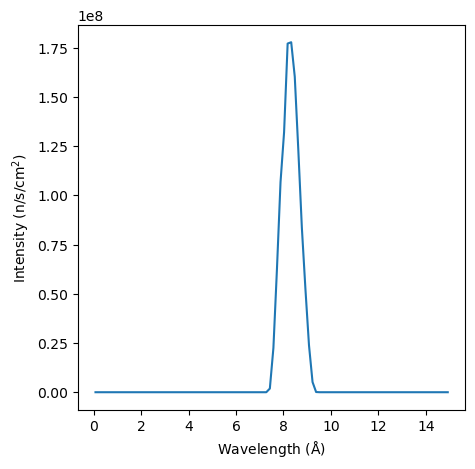

In [4]:
l_monitor_data = ms.name_search("l_monitor", data)
print([attr for attr in dir(l_monitor_data) if not callable(getattr(l_monitor_data, attr)) and not attr.startswith("_")])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.plot(l_monitor_data.xaxis, l_monitor_data.Intensity, label="Counts")
ax.set_xlabel(r"Wavelength ($\mathrm{\AA}$)")
ax.set_ylabel(r"Intensity ($\mathrm{n}/\mathrm{s}/\mathrm{cm}^2$)")